In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

514

In [5]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 11 | ribeira grande
Processing Record 2 of Set 11 | rio cuarto
Processing Record 3 of Set 11 | puerto ayora
Processing Record 4 of Set 11 | cairns
Processing Record 5 of Set 11 | la ronge
Processing Record 6 of Set 11 | zaraza
Processing Record 7 of Set 11 | punta arenas
Processing Record 8 of Set 11 | caravelas
Processing Record 9 of Set 11 | yellowknife
Processing Record 10 of Set 11 | turka
Processing Record 11 of Set 11 | vardo
Processing Record 12 of Set 11 | mataura
Processing Record 13 of Set 11 | deputatskiy
Processing Record 14 of Set 11 | yulara
Processing Record 15 of Set 11 | axim
Processing Record 16 of Set 11 | ushuaia
Processing Record 17 of Set 11 | los llanos de aridane
Processing Record 18 of Set 11 | rikitea
Processing Record 19 of Set 11 | nanortalik
Processing Record 20 of Set 11 | srednekolymsk
Processing Record 21 of Set 11 | barrow
Processing Record 22 of Set 11 | busselton
Pr

Processing Record 37 of Set 14 | yuyao
Processing Record 38 of Set 14 | necochea
Processing Record 39 of Set 14 | asgabat
Processing Record 40 of Set 14 | pyaozerskiy
Processing Record 41 of Set 14 | yerofey pavlovich
Processing Record 42 of Set 14 | khatanga
Processing Record 43 of Set 14 | sulz
Processing Record 44 of Set 14 | arman
Processing Record 45 of Set 14 | muros
Processing Record 46 of Set 14 | vestmannaeyjar
Processing Record 47 of Set 14 | san quintin
Processing Record 48 of Set 14 | rincon
Processing Record 49 of Set 14 | hermanus
Processing Record 50 of Set 14 | aquiraz
Processing Record 1 of Set 15 | vilhena
Processing Record 2 of Set 15 | kirakira
Processing Record 3 of Set 15 | veinticinco de mayo
Processing Record 4 of Set 15 | port hardy
Processing Record 5 of Set 15 | tilichiki
Processing Record 6 of Set 15 | ozinki
Processing Record 7 of Set 15 | dingle
Processing Record 8 of Set 15 | vanimo
Processing Record 9 of Set 15 | tautira
Processing Record 10 of Set 15 | 

Processing Record 19 of Set 18 | ipixuna
Processing Record 20 of Set 18 | lamar
Processing Record 21 of Set 18 | bolungarvik
City not found. Skipping...
Processing Record 22 of Set 18 | hong
Processing Record 23 of Set 18 | avera
Processing Record 24 of Set 18 | visby
Processing Record 25 of Set 18 | shingu
Processing Record 26 of Set 18 | le vauclin
Processing Record 27 of Set 18 | teknaf
Processing Record 28 of Set 18 | lukulu
Processing Record 29 of Set 18 | moindou
Processing Record 30 of Set 18 | itarema
Processing Record 31 of Set 18 | baiao
Processing Record 32 of Set 18 | kayseri
Processing Record 33 of Set 18 | usinsk
Processing Record 34 of Set 18 | meulaboh
Processing Record 35 of Set 18 | bull savanna
Processing Record 36 of Set 18 | road town
Processing Record 37 of Set 18 | jamame
Processing Record 38 of Set 18 | bathsheba
Processing Record 39 of Set 18 | iquique
Processing Record 40 of Set 18 | sekoma
Processing Record 41 of Set 18 | isangel
Processing Record 42 of Set 1

In [7]:
len(city_data)

466

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,69.73,88,92,27.51,PT,2021-11-07 00:33:48
1,Rio Cuarto,-33.1307,-64.3499,55.17,67,40,10.36,AR,2021-11-07 00:29:06
2,Puerto Ayora,-0.7393,-90.3518,69.37,77,49,9.73,EC,2021-11-07 00:33:48
3,Cairns,-16.9167,145.7667,90.95,62,40,5.75,AU,2021-11-07 00:33:48
4,La Ronge,55.1001,-105.2842,37.65,93,90,2.30,CA,2021-11-07 00:33:49
5,Zaraza,9.3503,-65.3245,77.41,79,89,5.61,VE,2021-11-07 00:33:49
6,Punta Arenas,-53.1500,-70.9167,50.11,81,90,9.22,CL,2021-11-07 00:33:49
7,Caravelas,-17.7125,-39.2481,72.86,79,71,6.35,BR,2021-11-07 00:33:50
8,Yellowknife,62.4560,-114.3525,31.41,90,75,9.22,CA,2021-11-07 00:30:48
9,Turka,49.1541,23.0297,33.94,90,60,5.99,UA,2021-11-07 00:33:50


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-11-07 00:33:48,38.5167,-28.7000,69.73,88,92,27.51
1,Rio Cuarto,AR,2021-11-07 00:29:06,-33.1307,-64.3499,55.17,67,40,10.36
2,Puerto Ayora,EC,2021-11-07 00:33:48,-0.7393,-90.3518,69.37,77,49,9.73
3,Cairns,AU,2021-11-07 00:33:48,-16.9167,145.7667,90.95,62,40,5.75
4,La Ronge,CA,2021-11-07 00:33:49,55.1001,-105.2842,37.65,93,90,2.30
...,...,...,...,...,...,...,...,...,...
461,Prince Rupert,CA,2021-11-07 00:45:52,54.3161,-130.3201,42.49,87,100,5.75
462,Aasiaat,GL,2021-11-07 00:46:21,68.7098,-52.8699,14.61,96,100,9.98
463,Palora,EC,2021-11-07 00:46:21,-1.7000,-77.9333,65.73,98,94,2.28
464,Korla,CN,2021-11-07 00:46:22,41.7597,86.1469,22.93,44,5,5.37


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

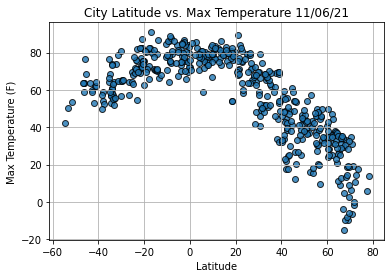

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

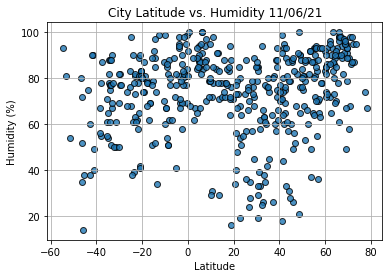

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

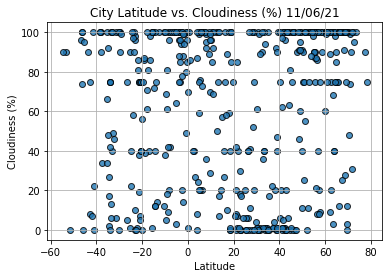

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

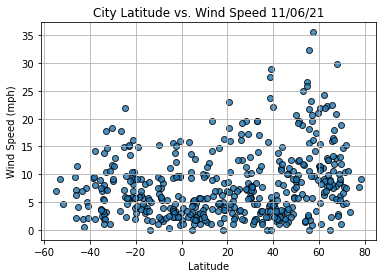

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-11-07 00:33:48,38.5167,-28.7000,69.73,88,92,27.51
4,La Ronge,CA,2021-11-07 00:33:49,55.1001,-105.2842,37.65,93,90,2.30
5,Zaraza,VE,2021-11-07 00:33:49,9.3503,-65.3245,77.41,79,89,5.61
8,Yellowknife,CA,2021-11-07 00:30:48,62.4560,-114.3525,31.41,90,75,9.22
9,Turka,UA,2021-11-07 00:33:50,49.1541,23.0297,33.94,90,60,5.99


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

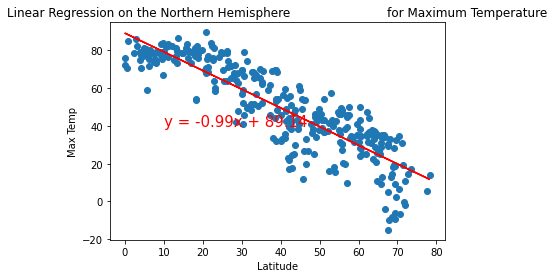

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

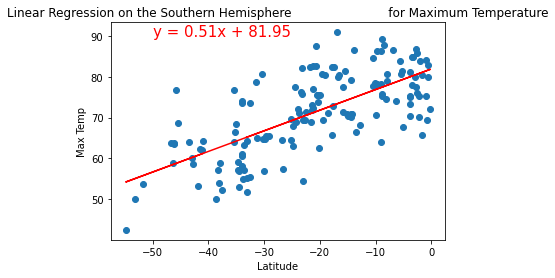

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

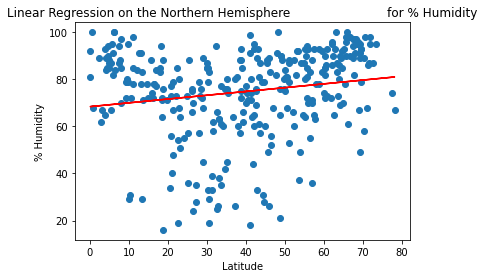

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

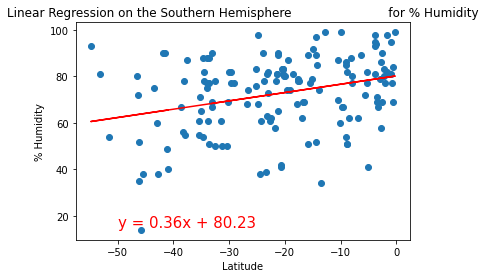

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

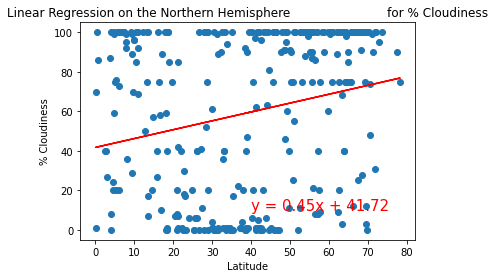

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

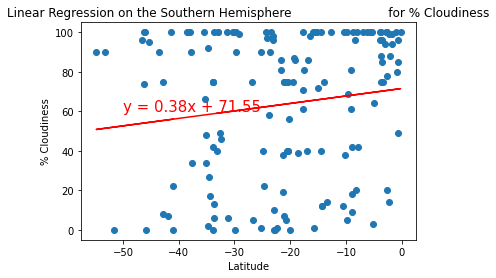

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

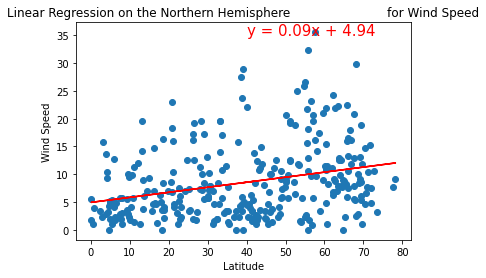

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

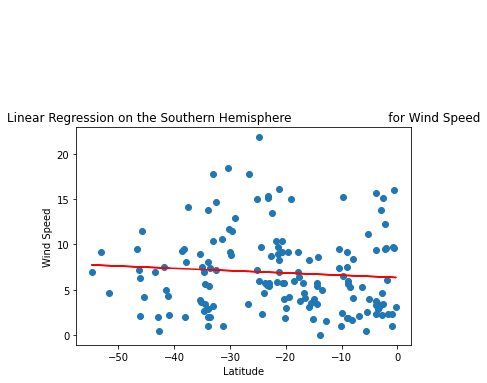

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [14]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [22]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Ribeira Grande,PT,11/7/2021 0:33,38.5167,-28.7000,69.73,88,92,27.51
1,1,Rio Cuarto,AR,11/7/2021 0:29,-33.1307,-64.3499,55.17,67,40,10.36
2,2,Puerto Ayora,EC,11/7/2021 0:33,-0.7393,-90.3518,69.37,77,49,9.73
3,3,Cairns,AU,11/7/2021 0:33,-16.9167,145.7667,90.95,62,40,5.75
4,4,La Ronge,CA,11/7/2021 0:33,55.1001,-105.2842,37.65,93,90,2.30


In [23]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [27]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

[69.73,
 55.17,
 69.37,
 90.95,
 37.65,
 77.41,
 50.11,
 72.86,
 31.41,
 33.94,
 34.52,
 63.48,
 69.64,
 78.17,
 42.46,
 64.15,
 75.72,
 31.3,
 4.77,
 19.42,
 57.04,
 71.17,
 79.12,
 38.41,
 86.34,
 76.33,
 78.26,
 44.06,
 82.33,
 80.33,
 57.38,
 44.24,
 71.67,
 74.75,
 2.44,
 40.82,
 68.07,
 60.12,
 6.44,
 80.37,
 57.22,
 41.88,
 65.35,
 46.02,
 64.26,
 41.41,
 33.49,
 58.93,
 33.71,
 47.32,
 63.82,
 78.75,
 53.87,
 77.04,
 42.66,
 79.05,
 86.45,
 82.26,
 44.2,
 9.03,
 64.83,
 80.42,
 79.09,
 16.12,
 78.22,
 58.26,
 45.72,
 77.72,
 64.4,
 73.42,
 75.6,
 65.16,
 44.28,
 17.33,
 75.58,
 81.05,
 41.27,
 84.18,
 77.09,
 33.4,
 20.8,
 71.47,
 72.23,
 21.76,
 78.78,
 77.05,
 79.88,
 9.1,
 63.88,
 82.56,
 69.19,
 31.17,
 68.38,
 72.99,
 71.47,
 87.57,
 43.75,
 75.22,
 76.14,
 66.16,
 62.29,
 79.3,
 75.49,
 64.4,
 39.15,
 66.42,
 73.62,
 30.36,
 58.75,
 75.38,
 62.82,
 41.94,
 26.64,
 46.54,
 63.09,
 74.64,
 32.88,
 48.87,
 46.11,
 54.55,
 41.05,
 58.32,
 72.07,
 25.16,
 50.59,
 71.4,
 36.64,

In [28]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
ffig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [30]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [31]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [32]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [33]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,5,Zaraza,VE,11/7/2021 0:33,9.3503,-65.3245,77.41,79,89,5.61
13,13,Axim,GH,11/7/2021 0:33,4.8699,-2.2405,78.17,88,59,4.83
16,16,Rikitea,PF,11/7/2021 0:33,-23.1203,-134.9692,75.72,81,96,15.17
22,22,Katherine,AU,11/7/2021 0:33,-14.4667,132.2667,79.12,89,40,5.75
24,24,Acajutla,SV,11/7/2021 0:33,13.5928,-89.8275,86.34,71,17,6.06
25,25,Matara,LK,11/7/2021 0:33,5.9485,80.5353,76.33,91,100,12.84
26,26,Takoradi,GH,11/7/2021 0:33,4.8845,-1.7554,78.26,87,99,5.17
28,28,Butaritari,KI,11/7/2021 0:33,3.0707,172.7902,82.33,67,27,15.75
29,29,Hilo,US,11/7/2021 0:33,19.7297,-155.0900,80.33,71,75,6.91
39,39,Faanui,PF,11/7/2021 0:33,-16.4833,-151.7500,80.37,69,98,4.12


In [35]:
preferred_cities_df.count()

City_ID       129
City          129
Country       129
Date          129
Lat           129
Lng           129
Max Temp      129
Humidity      129
Cloudiness    129
Wind Speed    129
dtype: int64

In [36]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
5,Zaraza,VE,77.41,9.3503,-65.3245,
13,Axim,GH,78.17,4.8699,-2.2405,
16,Rikitea,PF,75.72,-23.1203,-134.9692,
22,Katherine,AU,79.12,-14.4667,132.2667,
24,Acajutla,SV,86.34,13.5928,-89.8275,
25,Matara,LK,76.33,5.9485,80.5353,
26,Takoradi,GH,78.26,4.8845,-1.7554,
28,Butaritari,KI,82.33,3.0707,172.7902,
29,Hilo,US,80.33,19.7297,-155.0900,
39,Faanui,PF,80.37,-16.4833,-151.7500,


In [39]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [40]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [ ]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

In [41]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))